In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import copy
import os

import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from helper import df_to_latex, fig_path, set_figsize, tab_path

# Import code from src
sys.path.insert(0, '../src/')
import vmc 

# Set plot style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

# Set fontsizes in figures
fontsize = 10
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern"],
    "axes.labelsize": fontsize,
    "font.size": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize-1,
    "ytick.labelsize": fontsize-1,
    'legend.handlelength': 2
}

plt.rcParams.update(tex_fonts)

# Set figure size
width = 410 #360
figsize = set_figsize(width, fraction=1)

In [2]:
def exact_energy(N, dim, omega):
    return (omega * dim * N) / 2

def safe_initial_positions_no_interactions(wavefunction, alpha, N, dim, seed=None):
    rng = np.random.default_rng(seed=seed)
    positions = rng.random(size=(N, dim))

    # safe initialization
    wf2 = wavefunction.pdf(positions, alpha)
    while np.sum(wf2) <= 1e-14:
        positions *= 0.5
        wf2 = wavefunction.pdf(positions, alpha)

    return positions

def safe_initial_positions_w_interactions(wavefunction, alpha, N, dim, seed=None): 
    rng = np.random.default_rng(seed=seed)
    positions = rng.random(size=(N, dim))
    
    # safe initialization
    wf2 = wavefunction.pdf(positions, alpha)
    while np.sum(wf2) <= 1e-14: 
        positions *= 2.0
        wf2 = wavefunction.pdf(positions, alpha)
        
    return positions

## Grid search $\alpha$ with interactions

In [3]:
N = 10
dim = 3
omega = 1.

# Exact energy without interactions
NI_exact_energy_10 = exact_energy(N, dim, omega)
# Instantiate wave function
wf = vmc.AIB(N, dim, omega)

# Instantiate sampler
sampler = vmc.samplers.Metropolis(wf)

# Config
nsamples = 10000
alpha_step = 0.05
alphas = np.arange(0.1, 1 + alpha_step, alpha_step)

results = []

start = time.time()
for i, alpha in enumerate(alphas):
    initial_positions = safe_initial_positions_w_interactions(wf, alpha, N, dim)
    result = sampler.sample(nsamples,
                            initial_positions,
                            alpha,
                            nchains=1,
                            scale=1.0,
                            seed=None,
                            warm=True,
                            warmup_iter=500,
                            tune=True,
                            tune_iter=5000,
                            tune_interval=250,
                            tol_tune=1e-5,
                            optimize=False
                           )
    results.append(result)

end = time.time()
print("Sampler elapsed time:", end - start)

Sampler elapsed time: 359.35431146621704


In [4]:
df_N10 = pd.concat(results, ignore_index=True)
df_N10

,nparticles,dim,alpha,energy,standard_error,accept_rate
0,10,3,0.10,38.774945,0.895397,0.520363
1,10,3,0.15,28.199974,0.551094,0.486977
2,10,3,0.20,21.860227,0.370810,0.534193
3,10,3,0.25,18.884532,0.230148,0.474897
4,10,3,0.30,17.536608,0.200315,0.473610
5,10,3,0.35,16.328998,0.127726,0.485520
6,10,3,0.40,15.568797,0.070598,0.466593
7,10,3,0.45,15.419705,0.034483,0.470797
8,10,3,0.50,15.381786,0.005164,0.509867
9,10,3,0.55,15.548693,0.039218,0.498953


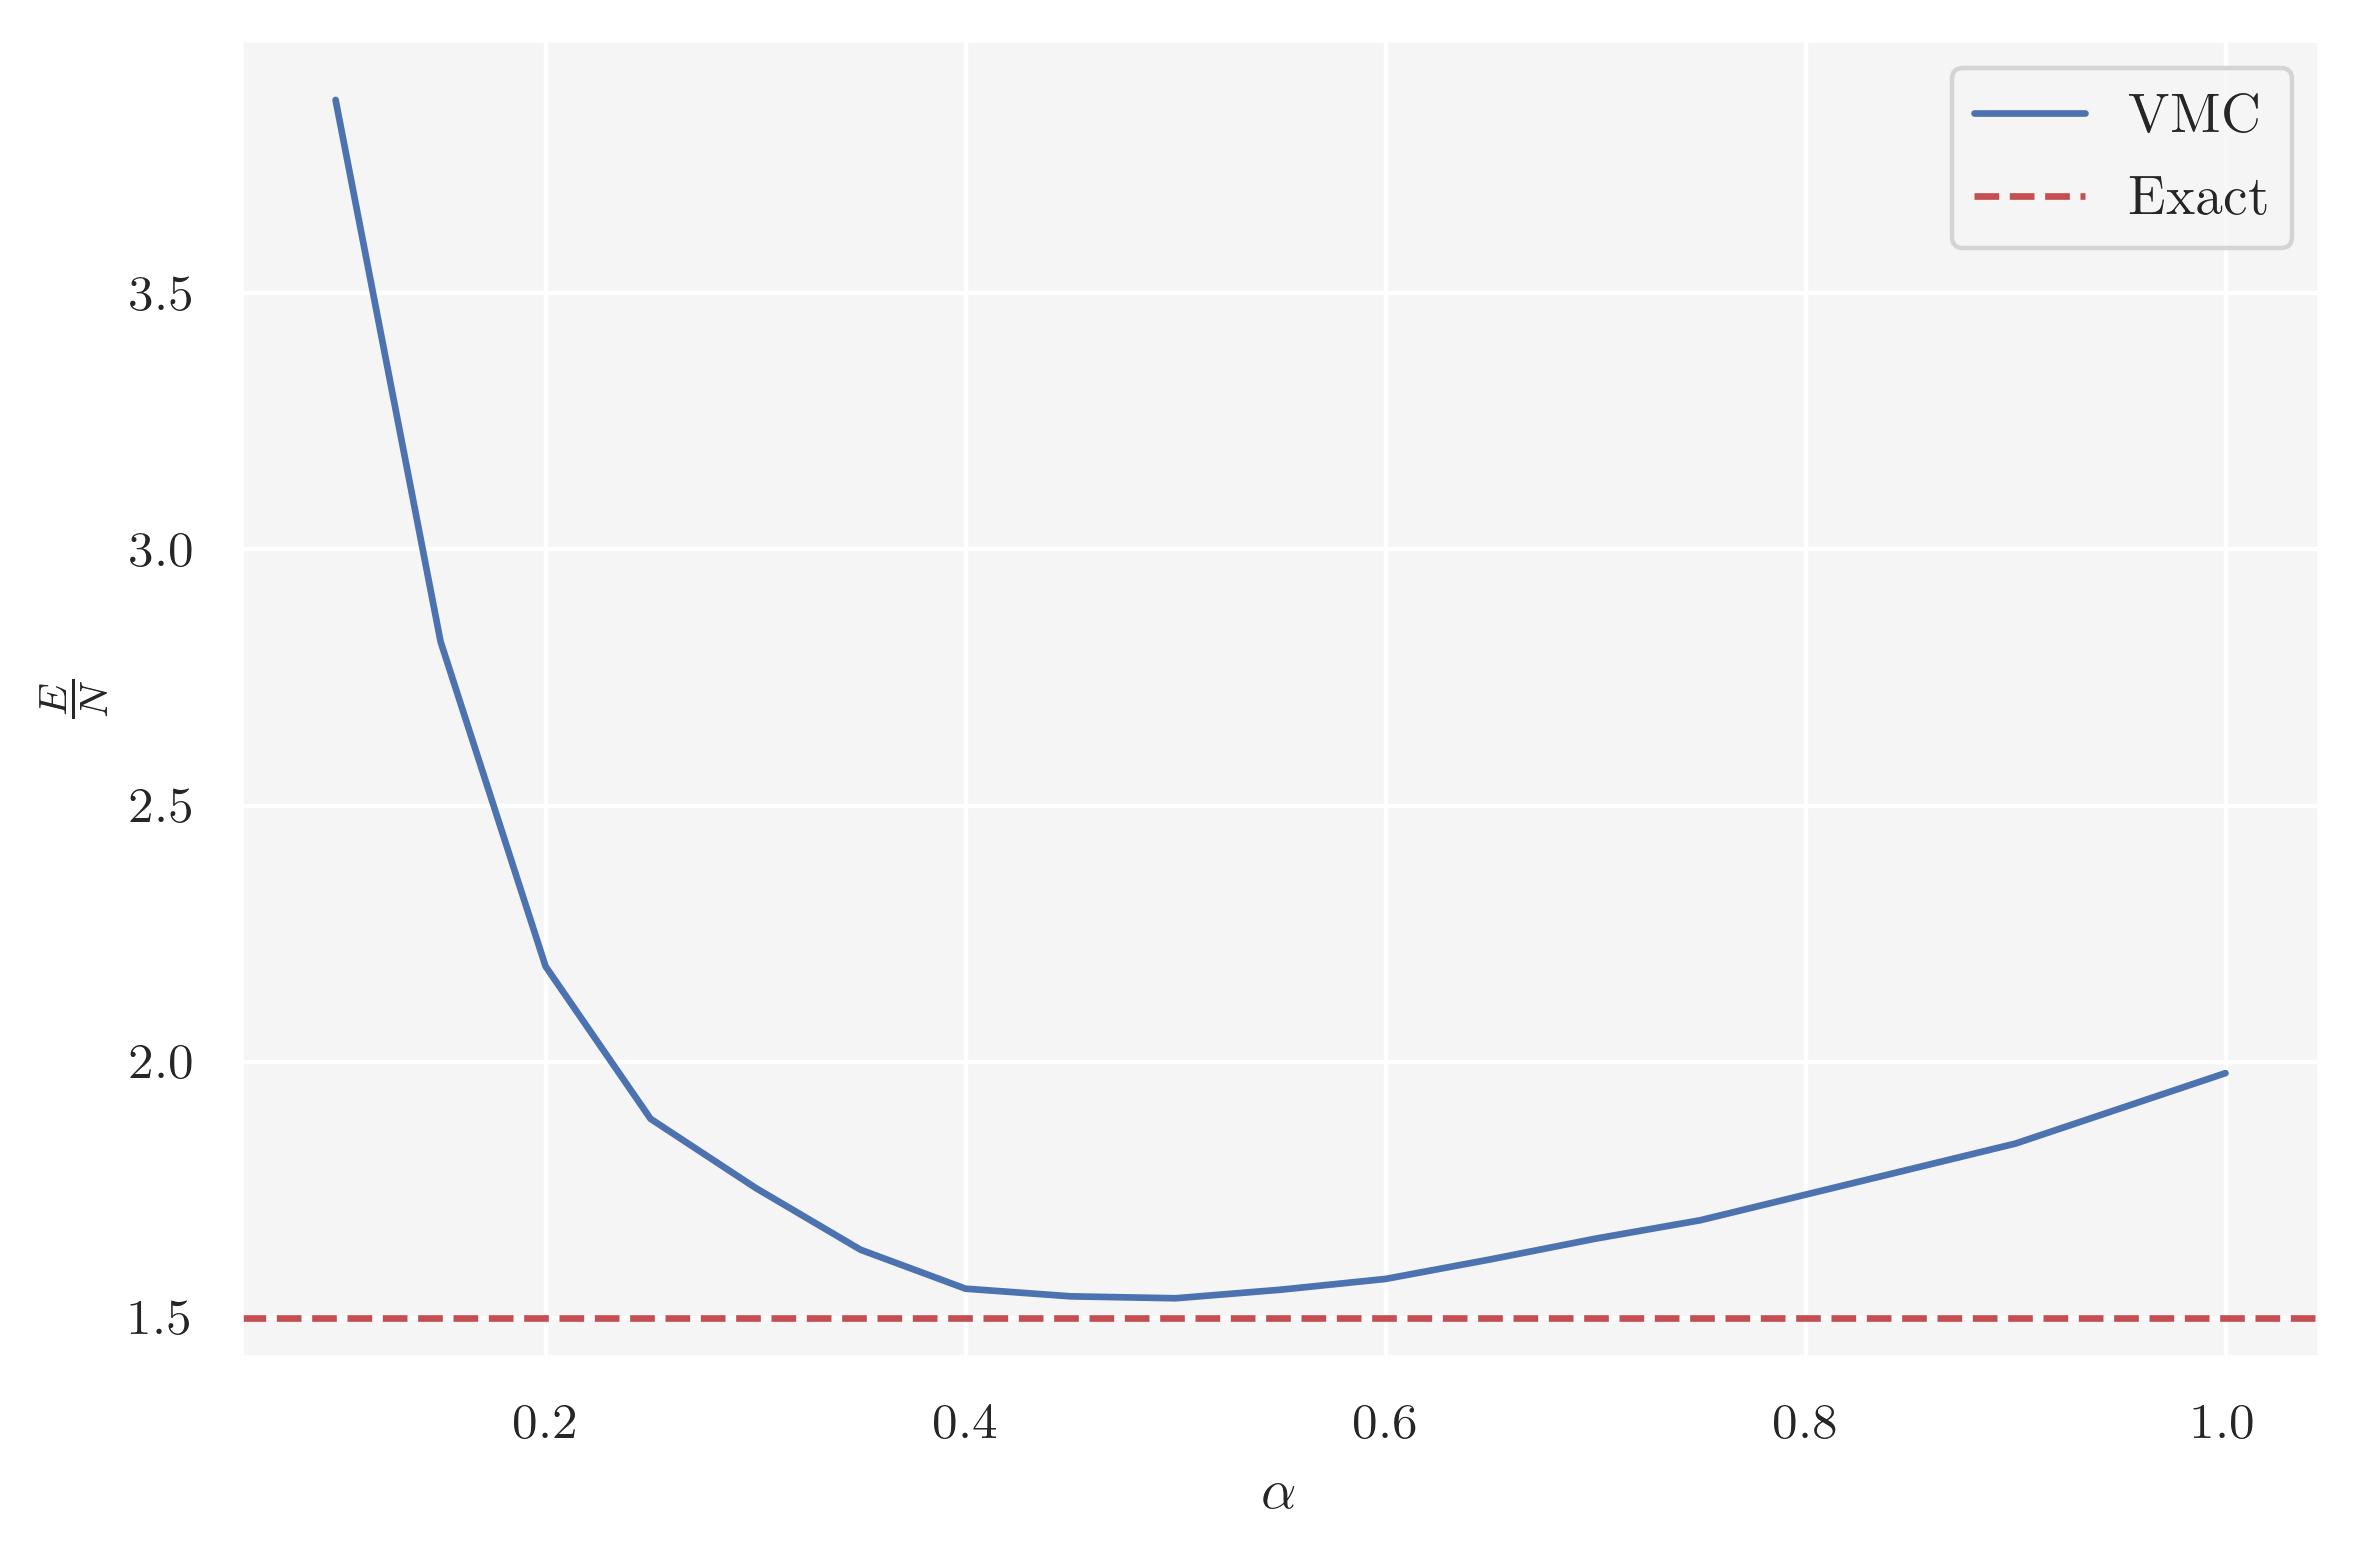

In [5]:
mod_df_10 = df_N10
mod_df_10["energy"] = mod_df_10["energy"]/10.0
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_10, x="alpha", y="energy", ax=ax, label="VMC")
ax.axhline(NI_exact_energy_10/10.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_N_10.pdf"), bbox_inches='tight')

In [ ]:
N = 50
dim = 3
omega = 1.

# Exact energy without interactions
NI_exact_energy_50 = exact_energy(N, dim, omega)
# Instantiate wave function
wf = vmc.AIB(N, dim, omega)

# Instantiate sampler
sampler = vmc.samplers.Metropolis(wf)

# Config
nsamples = 10000
alpha_step = 0.1
alphas = np.arange(0.1, 1 + alpha_step, alpha_step)

results_N50 = []

start = time.time()
for i, alpha in enumerate(alphas):
    initial_positions = safe_initial_positions_w_interactions(wf, alpha, N, dim)
    result = sampler.sample(nsamples,
                            initial_positions,
                            alpha,
                            nchains=1,
                            scale=1.0,
                            seed=None,
                            warm=True,
                            warmup_iter=500,
                            tune=True,
                            tune_iter=5000,
                            tune_interval=250,
                            tol_tune=1e-5,
                            optimize=False
                           )
    results_N50.append(result)

end = time.time()
print("Sampler elapsed time:", end - start)

In [ ]:
df_N50 = pd.concat(results_N50, ignore_index=True)
df_N50

In [ ]:
mod_df_50 = df_N50
mod_df_50["energy"] = mod_df_50["energy"]/50.0
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_50, x="alpha", y="energy", ax=ax, label="VMC")
ax.axhline(NI_exact_energy/50.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_N_50.pdf"), bbox_inches='tight')

In [ ]:
N = 100
dim = 3
omega = 1.

# Exact energy without interactions
NI_exact_energy_100 = exact_energy(N, dim, omega)
# Instantiate wave function
wf = vmc.AIB(N, dim, omega)

# Instantiate sampler
sampler = vmc.samplers.Metropolis(wf)

# Config
nsamples = 10000
alpha_step = 0.1
alphas = np.arange(0.1, 1 + alpha_step, alpha_step)

results_N100 = []

start = time.time()
for i, alpha in enumerate(alphas):
    initial_positions = safe_initial_positions_w_interactions(wf, alpha, N, dim)
    result = sampler.sample(nsamples,
                            initial_positions,
                            alpha,
                            nchains=1,
                            scale=1.0,
                            seed=None,
                            warm=True,
                            warmup_iter=500,
                            tune=True,
                            tune_iter=5000,
                            tune_interval=250,
                            tol_tune=1e-5,
                            optimize=False
                           )
    results_N100.append(result)

end = time.time()
print("Sampler elapsed time:", end - start)

In [ ]:
df_N100 = pd.concat(results_N100, ignore_index=True)
df_N100

In [ ]:
mod_df_100 = df_N100
mod_df_100["energy"] = mod_df_100["energy"]/100.0
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df, x="alpha", y="energy", ax=ax, label="VMC")
ax.axhline(NI_exact_energy_100/100.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_N_100.pdf"), bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_10, x="alpha", y="energy", ax=ax, label="N=10")
sns.lineplot(data=mod_df_50, x="alpha", y="energy", ax=ax, label="N=50")
sns.lineplot(data=mod_df_100, x="alpha", y="energy", ax=ax, label="N=100")
ax.axhline(NI_exact_energy_100/100.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_all_N.pdf"), bbox_inches='tight')